In [12]:
import sys
sys.path.append('/Users/nana/venv/hoggnation/oscillator_catalog')

import star_functions as nana
print(dir(star_functions))

NameError: name 'star_functions' is not defined

In [13]:
import importlib
importlib.reload(nana)

<module 'star_functions' from '/Users/nana/venv/hoggnation/oscillator_catalog/star_functions.py'>

In [14]:
%reload_ext autoreload
%autoreload 2

In [15]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
from astropy.table import Table
from astropy.io import ascii
import numpy as np
from astropy import units as u

In [4]:
star_files = glob.glob("*.dat")

In [5]:
print(star_files)
#kplr010536147

['kplr005309849_pixeldata_manualdetrended.dat', 'kplr004939281_pixeldata_manualdetrended.dat', 'kplr003865742.dat', 'kplr004930889.dat', 'kplr010526294.dat', 'kplr005941844_pixeldata_manualdetrended.dat', 'kplr006462033_pixeldata_manualdetrended.dat', 'kplr011971405_pixeldata_tilloutburst.dat', 'kplr007760680_pixeldata_filtered_manualdetrended.dat', 'kplr009020774.dat', 'kplr006352430.dat', 'kplr010536147.dat', 'kplr008459899.dat', 'kplr003459297.dat', 'kplr008714886.dat', 'kplr003240411.dat', 'kplr008057661.dat', 'kplr012258330.dat', 'kplr011360704.dat', 'kplr008255796_pixeldata_manualdetrended.dat', 'kplr008766405.dat', 'kplr004936089_pixeldata_manualdetrended.dat', 'kplr006780397_pixeldata_manualdetrended.dat', 'kplr007630417_pixeldata_manualdetrended.dat', 'kplr009715425_pixeldata_manualdetrended_full_v2.dat', 'kplr008381949.dat']


In [6]:
lc, delta_f, sampling_time, exptime = nana.star("kplr005309849", exptime = "short")
print(sampling_time, exptime)


nana.star(): no results at this cadence
None None


In [7]:
def do_one_star(star_fn, exptime = 'long'):
    
    star = star_fn[:13] #brittle

    print("working on ", star)
    
    #pipeline 
    lc, delta_f, sampling_time, exptime = nana.star(star, exptime = exptime)
    print("delta_f:", delta_f)
    print("sampling_time:", sampling_time)
    if lc is None:
        return 
    f_max = (3 / (2*sampling_time))
    f_min = delta_f/3
    t_fit, flux_fit, weight_fit = nana.mask_vals(lc)
    freq_full, power_full = nana.pg_full(f_min, f_max, lc)
    freq_mini, power_mini = nana.pg_mini(f_min, f_max, lc )
    indices = nana.get_filtered_peaks(12, freq_mini, power_mini)
    refined_freq, refined_power, second_derivatives = nana.refine_peaks(freq_mini, power_mini, indices)
    fc = nana.folding_freq(delta_f, freq_full, power_full, sampling_time, False)
    regions, final_freqs, chi2s = nana.region_and_freq(indices, fc, f_min, freq_mini, power_mini, t_fit, flux_fit, weight_fit, exptime)

    plt.plot(freq_full, power_full, 'k.')
    plt.scatter(final_freqs, refined_power, color = 'red', marker = 'o')
    plt.show()
    
    plt.plot(freq_mini, power_mini, 'g-')
    plt.semilogy()
    plt.show()
    
    a_early, a_late, b_early, b_late = nana.check_coherence(t_fit, flux_fit, weight_fit, final_freqs, exptime)
    rate_of_phase, rate_of_amp = nana.change_in_phase_and_amp(a_early, a_late, b_early, b_late, t_fit)
    delta_chi2s = nana.null_chi_squared(t_fit, flux_fit, weight_fit) - chi2s
    sharpnesses = nana.sharpness(second_derivatives, refined_power)
    
    '''
    data = Table()


    data['modes'] = final_freqs
    data['regions'] = regions
    data['corresponding_freq_in_region_A'] = refined_freq
    data['sharpness'] = sharpnesses
    data['delta_chi_squares'] = delta_chi2s
    data['rate_of_change_of_phase'] = rate_of_phase
    data['rate_of_change_of_amplitude'] = rate_of_amp
    
    ascii.write(
        data,
        star + '.csv',
        overwrite=True,
        format="csv",
        formats={
            "modes": "{:.10f}",
            "corresponding_freq_in_region_A": "{:.5f}",
            "sharpness": "{:.7e}",
            "delta_chi_squares": "{:.7e}",
            "rate_of_change_of_phase": "{:.7e}",
            "rate_of_change_of_amplitude": "{:.7e}"
        }
    )
    '''

    return
    

working on  kplr005309849
delta_f: 0.0006800582596801787
sampling_time: 0.02043365494319005


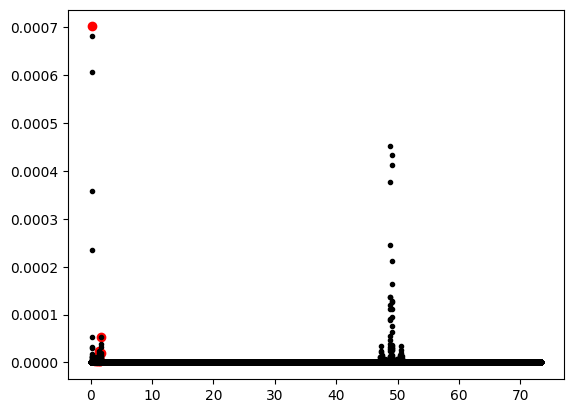

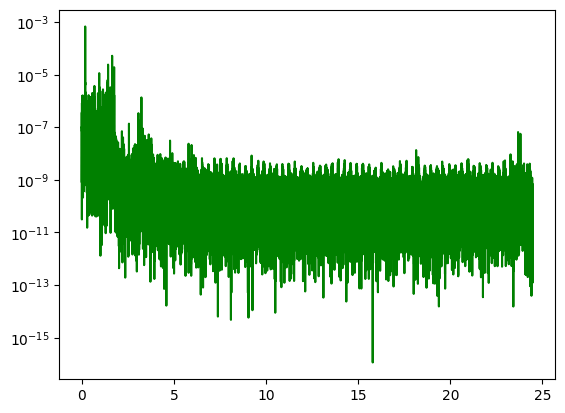

working on  kplr004939281
delta_f: 0.0006800582599352845
sampling_time: 0.02043360477182432


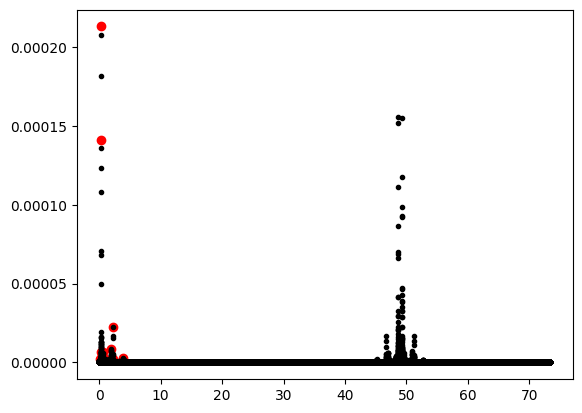

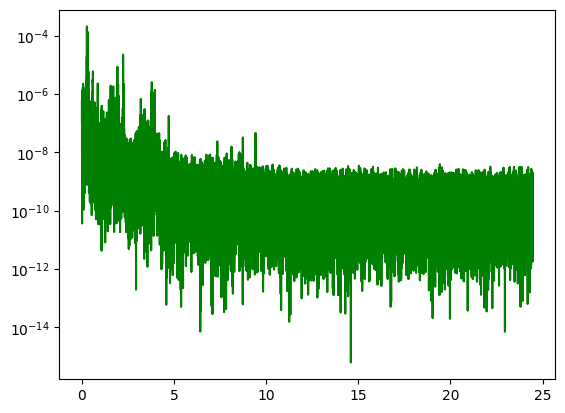

working on  kplr003865742
delta_f: 0.0006800582705472552
sampling_time: 0.02043361803953303


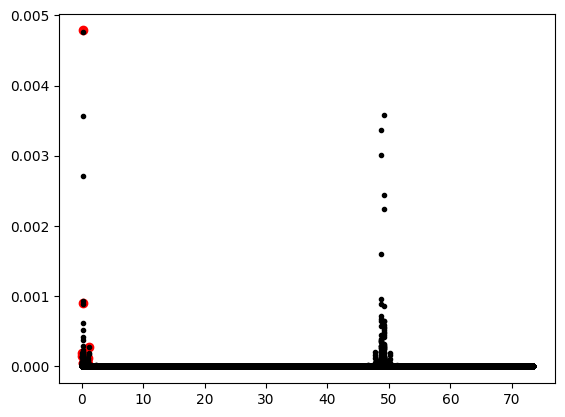

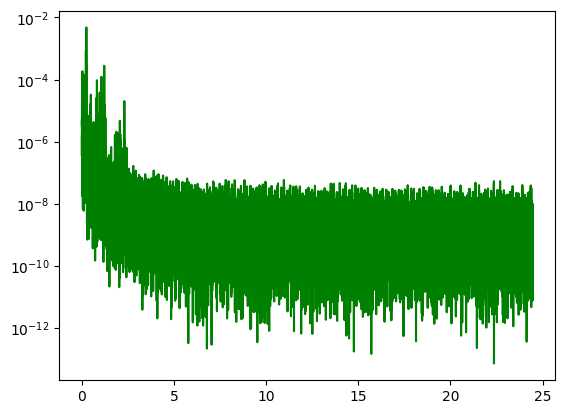

working on  kplr004930889
delta_f: 0.0006800582569134927
sampling_time: 0.02043363155098632


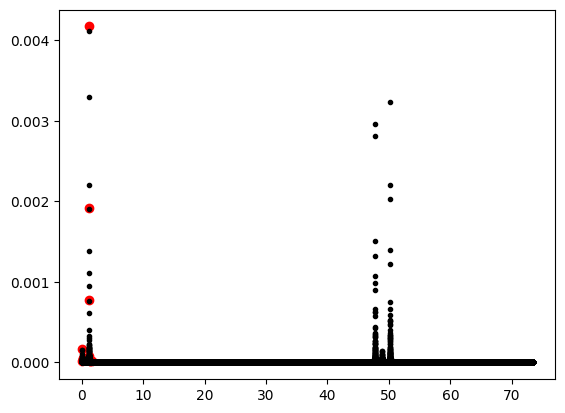

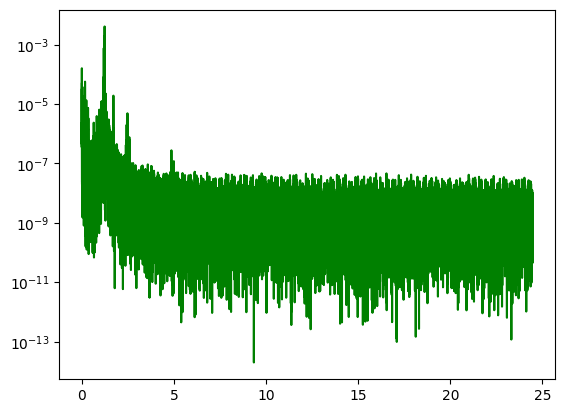

working on  kplr010526294
delta_f: 0.0006851712037628133
sampling_time: 0.020433621539268643


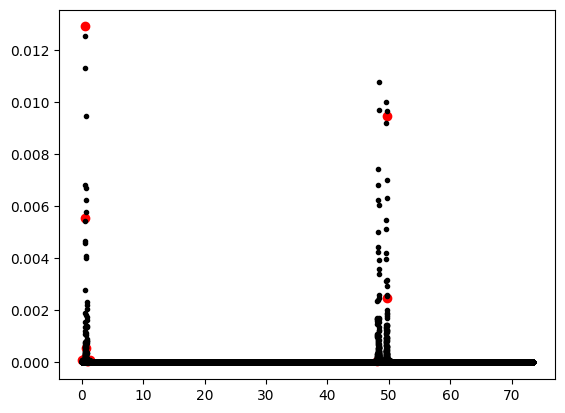

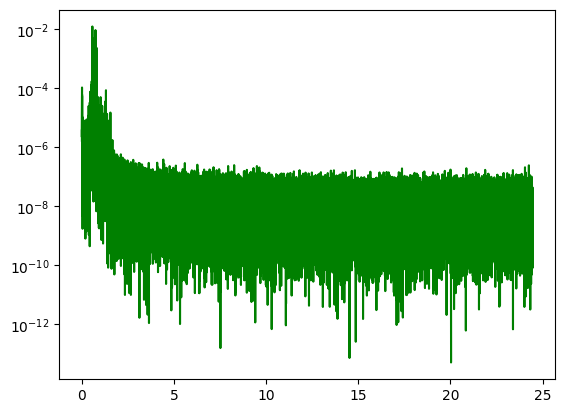

working on  kplr005941844
delta_f: 0.0006956909625508269
sampling_time: 0.020433309895452112


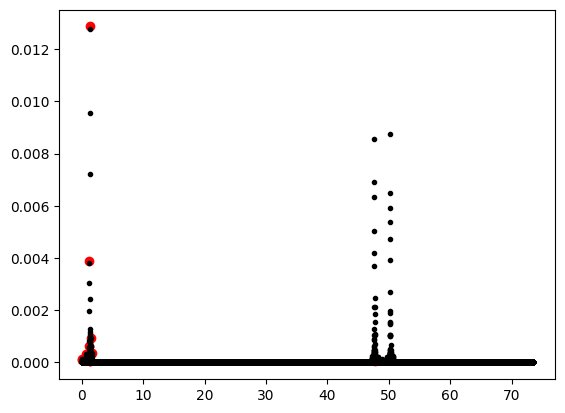

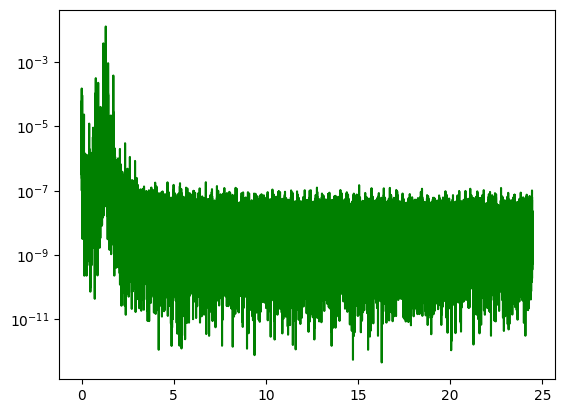

working on  kplr006462033
nana.star(): some time intervals out of spec


ValueError: some time intervals out of spec

In [8]:
for star in star_files:
    do_one_star(star, exptime = exptime)

In [ ]:
plt.plot(lc.time.value, lc.flux.value)

In [ ]:
data = pd.read_csv('kplr011360704.dat')
data = pd.read_csv('kplr011360704.dat', sep=r'\s+', header=None, names=['time', 'flux'])

In [ ]:
plt.plot(data['time'], data['flux'], 'k-', linewidth = 0.4)
plt.xlabel("Time")
plt.ylabel("Flux")

In [ ]:
time = data['time'].to_numpy()
flux = data['flux'].to_numpy()
print(time.shape, flux.shape)

In [ ]:
time = data['time'].to_numpy()
flux = data['flux'].to_numpy()

time, flux = nana.reorder_inputs(time, flux)
lc = LightCurve(time=time, flux=flux)

observation_time = time[-1] - time[0]
delta_f = (1/observation_time) 
sampling_time= np.median(np.diff(time))

f_max = (2 / (sampling_time))
f_min = delta_f/3

frequency_grid_full = np.arange(f_min, f_max, f_min)/(u.day)
pg_full = lc.to_periodogram(
    method='lombscargle',
    normalization='psd',
    frequency=frequency_grid_full
)
power_full = pg_full.power.value
freq_full = pg_full.frequency.to(1/u.day).value


frequency_grid_mini = np.arange(f_min, f_max / 3, f_min) / u.day
pg_mini = lc.to_periodogram(
    method='lombscargle',
    normalization='psd',
    frequency=frequency_grid_mini
)
power_mini = pg_mini.power.value
freq_mini = pg_mini.frequency.to(1 / u.day).value

t_clean = np.ma.filled(time, np.nan)
flux_clean = np.ma.filled(flux, np.nan)
mask = np.isfinite(t_clean) & np.isfinite(flux_clean) #& np.isfinite(sigma_clean

t_fit = t_clean[mask]
flux_fit = flux_clean[mask]
#sigma_fit = sigma_clean[mask]
#weight_fit = 1 / sigma_fit**2


#t_fit, flux_fit, weight_fit = nana.mask_vals(lc)
print(t_fit.shape, flux_fit.shape)
freq_full, power_full = nana.pg_full(f_min, f_max, lc)
freq_mini, power_mini = nana.pg_mini(f_min, f_max, lc )
indices = nana.get_filtered_peaks(12, freq_mini, power_mini)
refined_freq, refined_power, second_derivatives = nana.refine_peaks(freq_mini, power_mini, indices)
fc = nana.folding_freq(delta_f, freq_full, power_full, sampling_time, False)
regions, final_freqs, chi2s = nana.region_and_freq(indices, fc, f_min, freq_mini, power_mini, t_fit, flux_fit, weight_fit)
a_early, a_late, b_early, b_late = nana.check_coherence(t_fit, flux_fit, weight_fit, final_freqs)
rate_of_phase, rate_of_amp = nana.change_in_phase_and_amp(a_early, a_late, b_early, b_late, t_fit)
delta_chi2s = nana.null_chi_squared(flux_fit, weight_fit) - chi2s
sharpnesses = nana.sharpness(second_derivatives, refined_power)


working on  kplr009715425
delta_f: 0.0006800581880640648
sampling_time: 0.020433642610441893


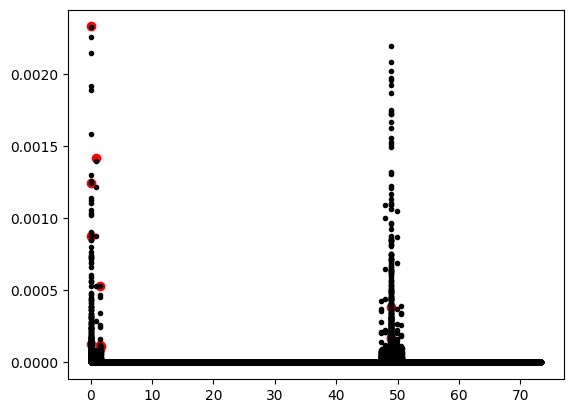

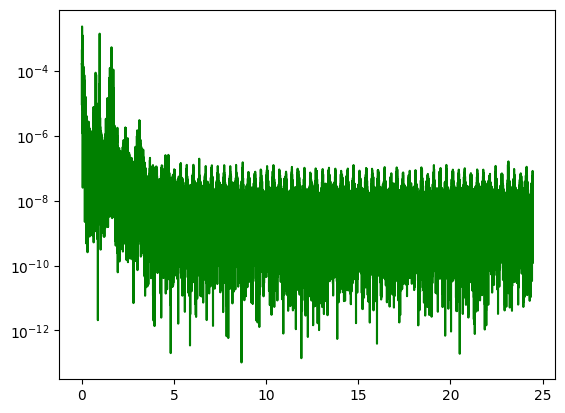

In [9]:
do_one_star("kplr009715425")

In [10]:
#aerts star
lc, delta_f, sampling_time, exptimeaerts = nana.star('kplr009715425')
print("delta_f:", delta_f)
print("sampling_time:", sampling_time)
#if lc is None:
    #return 
f_max = (3 / (2*sampling_time))
f_min = delta_f/3
t_fitaerts, flux_fitaerts, weight_fitaerts = nana.mask_vals(lc)
freq_full, power_full = nana.pg_full(f_min, f_max, lc)
freq_mini, power_mini = nana.pg_mini(f_min, f_max, lc )
indices = nana.get_filtered_peaks(12, freq_mini, power_mini)
refined_freq, refined_power, second_derivatives = nana.refine_peaks(freq_mini, power_mini, indices)
fc = nana.folding_freq(delta_f, freq_full, power_full, sampling_time, False)
regions, final_freqsaerts, chi2s = nana.region_and_freq(indices, fc, f_min, freq_mini, power_mini, t_fit, flux_fit, weight_fit, exptime)

plt.plot(freq_full, power_full, 'k.')
plt.scatter(final_freqs, refined_power, color = 'red', marker = 'o')
plt.show()

plt.plot(freq_mini, power_mini, 'g-')
plt.semilogy()
plt.show()

a_early, a_late, b_early, b_late = nana.check_coherence(t_fit, flux_fit, weight_fit, final_freqs, exptime)
rate_of_phase, rate_of_amp = nana.change_in_phase_and_amp(a_early, a_late, b_early, b_late, t_fit)
delta_chi2s = nana.null_chi_squared(flux_fit, weight_fit) - chi2s
sharpnesses = nana.sharpness(second_derivatives, refined_power)

delta_f: 0.0006800581880640648
sampling_time: 0.020433642610441893


NameError: name 't_fit' is not defined

In [13]:
def check_coherence2(ts, ys, weights, oms, T):

    Qs = [[[ ] , [ ]] for i in range(4)]

    ts_median = np.median(ts)
    t_first = np.median(ts[ts < ts_median])
    t_third = np.median(ts[ts >= ts_median])

    mask_q1 = (ts < ts_median) & (ts < t_first)
    mask_q2 = (ts < ts_median) & (ts >= t_first)
    mask_q3 = (ts >= ts_median) & (ts < t_third)
    mask_q4 = (ts >= ts_median) & (ts >= t_third)

    cases = [mask_q1, mask_q2, mask_q3, mask_q4]
    
    for om in oms:
        for q, I in zip(Qs, cases):
            A = nana.integral_design_matrix(ts[I], om, T)
            pars, _ =nana.weighted_least_squares_new(A, ys[I], weights[I])
            q[0].append(pars[1])
            q[1].append(pars[2])

    return Qs[0], Qs[1], Qs[2], Qs[3]
            



In [ ]:
q1, q2, q3, q4 = check_coherence2(t_fitaerts, flux_fitaerts, weight_fitaerts, final_freqsaerts, exptimeaerts)

In [ ]:
plt.plot(q1[0], q1[1], 'k.')
plt.title("First Quarter Aerts star")
plt.ylabel("b points")
plt.xlabel("a points")
plt.show()

plt.plot(q2[0], q2[1], 'k.')
plt.title("Second Quarter Aerts star")
plt.ylabel("b points")
plt.xlabel("a points")
plt.show()

plt.plot(q3[0], q3[1], 'k.')
plt.title("Third Quarter Aerts star")
plt.ylabel("b points")
plt.xlabel("a points")
plt.show()

plt.plot(q4[0], q4[1], 'k.')
plt.title("Fourth Quarter Aerts star")
plt.ylabel("b points")
plt.xlabel("a points")
plt.show()

delta_f: 0.0006800582572566702
sampling_time: 0.02043360086827306


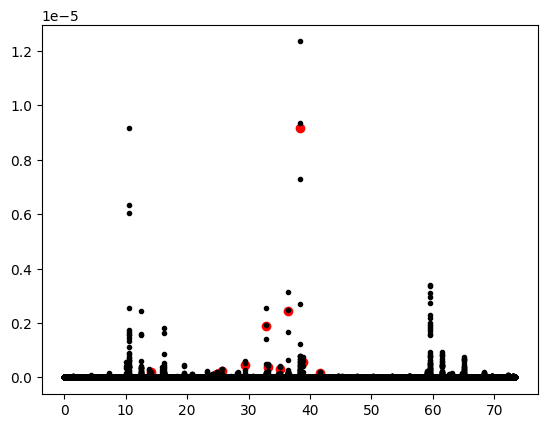

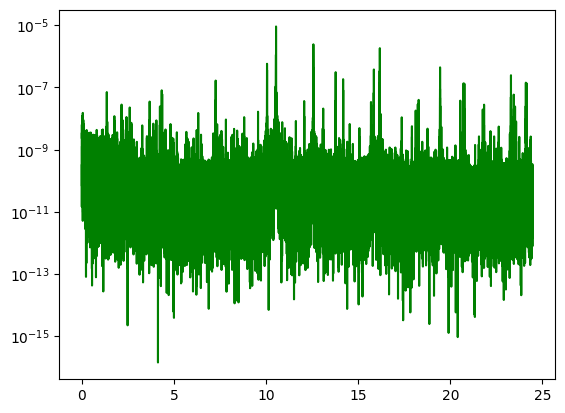

In [23]:
#og KIC 520 star star
lc, delta_f, sampling_time, exptime520 = nana.star('KIC 5202905')
print("delta_f:", delta_f)
print("sampling_time:", sampling_time)
#if lc is None:
    #return 
f_max = (3 / (2*sampling_time))
f_min = delta_f/3
t_fit520, flux_fit520, weight_fit520 = nana.mask_vals(lc)
freq_full, power_full = nana.pg_full(f_min, f_max, lc)
freq_mini, power_mini = nana.pg_mini(f_min, f_max, lc )
indices = nana.get_filtered_peaks(12, freq_mini, power_mini)
refined_freq, refined_power, second_derivatives = nana.refine_peaks(freq_mini, power_mini, indices)
fc = nana.folding_freq(delta_f, freq_full, power_full, sampling_time, False)
regions, final_freqs520, chi2s = nana.region_and_freq(indices, fc, f_min, freq_mini, power_mini, t_fit520, flux_fit520, weight_fit520, exptime520)

plt.plot(freq_full, power_full, 'k.')
plt.scatter(final_freqs520, refined_power, color = 'red', marker = 'o')
plt.show()

plt.plot(freq_mini, power_mini, 'g-')
plt.semilogy()
plt.show()

a_early, a_late, b_early, b_late = nana.check_coherence(t_fit520, flux_fit520, weight_fit520, final_freqs520, exptime520)
rate_of_phase, rate_of_amp = nana.change_in_phase_and_amp(a_early, a_late, b_early, b_late, t_fit520)
delta_chi2s = nana.null_chi_squared(flux_fit520, weight_fit520) - chi2s
sharpnesses = nana.sharpness(second_derivatives, refined_power)

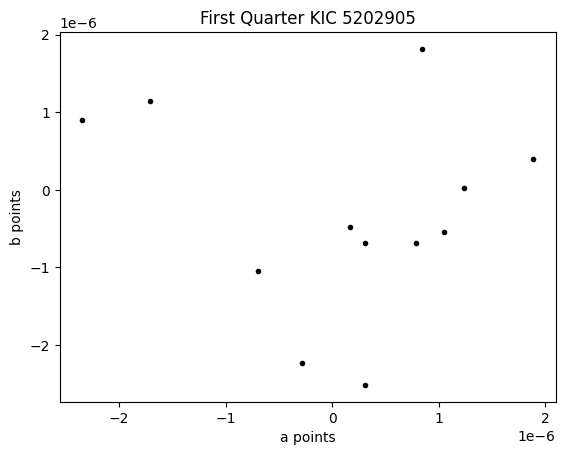

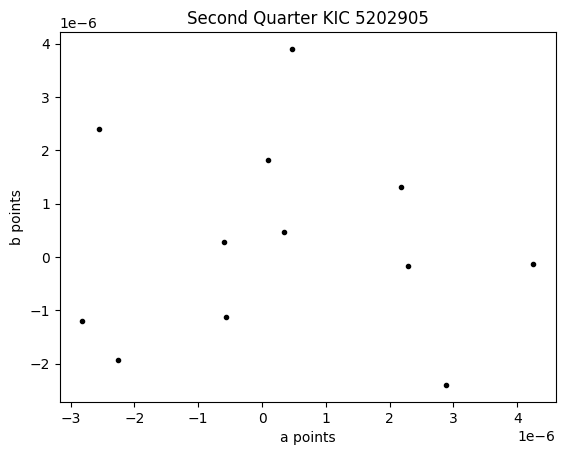

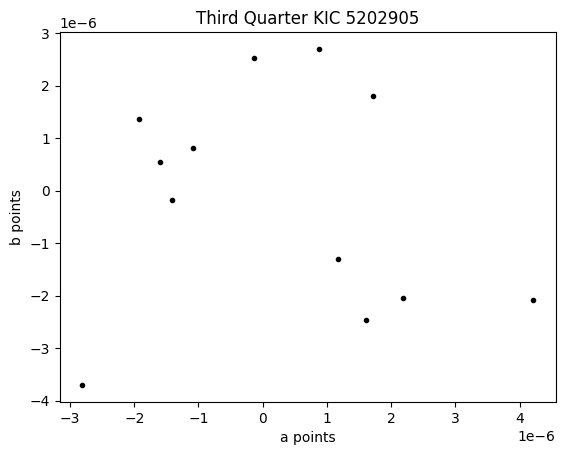

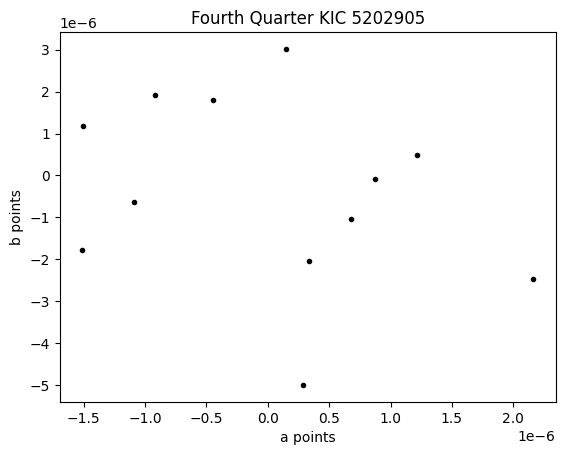

In [14]:
q1, q2, q3, q4 = check_coherence2(t_fit520, flux_fit520, weight_fit520, final_freqs520, exptime520)

plt.plot(q1[0], q1[1], 'k.')
plt.title("First Quarter KIC 5202905")
plt.ylabel("b points")
plt.xlabel("a points")
plt.show()

plt.plot(q2[0], q2[1], 'k.')
plt.title("Second Quarter KIC 5202905")
plt.ylabel("b points")
plt.xlabel("a points")
plt.show()

plt.plot(q3[0], q3[1], 'k.')
plt.title("Third Quarter KIC 5202905")
plt.ylabel("b points")
plt.xlabel("a points")
plt.show()

plt.plot(q4[0], q4[1], 'k.')
plt.title("Fourth Quarter KIC 5202905")
plt.ylabel("b points")
plt.xlabel("a points")
plt.show()

In [ ]:
def check_coherence2(ts, ys, weights, oms, T):

    Qs = [[[ ] , [ ]] for i in range(4)]

    ts_median = np.median(ts)
    t_first = np.median(ts[ts < ts_median])
    t_third = np.median(ts[ts >= ts_median])

    mask_q1 = (ts < ts_median) & (ts < t_first)
    mask_q2 = (ts < ts_median) & (ts >= t_first)
    mask_q3 = (ts >= ts_median) & (ts < t_third)
    mask_q4 = (ts >= ts_median) & (ts >= t_third)

    cases = [mask_q1, mask_q2, mask_q3, mask_q4]
    
    for om in oms:
        for q, I in zip(Qs, cases):
            A = nana.integral_design_matrix(ts[I], om, T)
            pars, _ =nana.weighted_least_squares_new(A, ys[I], weights[I])
            q[0].append(pars[1])
            q[1].append(pars[2])

    return Qs[0], Qs[1], Qs[2], Qs[3]
            

In [7]:
#t_fit520, flux_fit520, weight_fit520, final_freqs520, exptime520

def check_coherence_test(ts, ys, weights, final_freq, T):

    oms = np.array([f * 2 * np.pi for f in final_freq])
    arrays = np.zeros((len(oms), 4, 2))
    
    ts_median = np.median(ts)
    t_first = np.median(ts[ts < ts_median])
    t_third = np.median(ts[ts >= ts_median])
    
    mask_q1 = (ts < ts_median) & (ts < t_first)
    mask_q2 = (ts < ts_median) & (ts >= t_first)
    mask_q3 = (ts >= ts_median) & (ts < t_third)
    mask_q4 = (ts >= ts_median) & (ts >= t_third)
    
    cases = [mask_q1, mask_q2, mask_q3, mask_q4]

    for idx, om in enumerate(oms):
        for i, I in enumerate(cases):
            A = nana.integral_design_matrix(ts[I], om, T)
            pars, _ = nana.weighted_least_squares_new(A, ys[I], weights[I])
            arrays[idx][i][0] = pars[1]
            arrays[idx][i][1] = pars[2]
    
    return arrays #returns each freq, quarter, then a and b


In [ ]:
plt.plot(q1[0], q1[1], 'k.')
plt.title("First Quarter KIC 5202905")
plt.ylabel("b points")
plt.xlabel("a points")
plt.show()

plt.plot(q2[0], q2[1], 'k.')
plt.title("Second Quarter KIC 5202905")
plt.ylabel("b points")
plt.xlabel("a points")
plt.show()

plt.plot(q3[0], q3[1], 'k.')
plt.title("Third Quarter KIC 5202905")
plt.ylabel("b points")
plt.xlabel("a points")
plt.show()

plt.plot(q4[0], q4[1], 'k.')
plt.title("Fourth Quarter KIC 5202905")
plt.ylabel("b points")
plt.xlabel("a points")
plt.show()

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(12, 9))


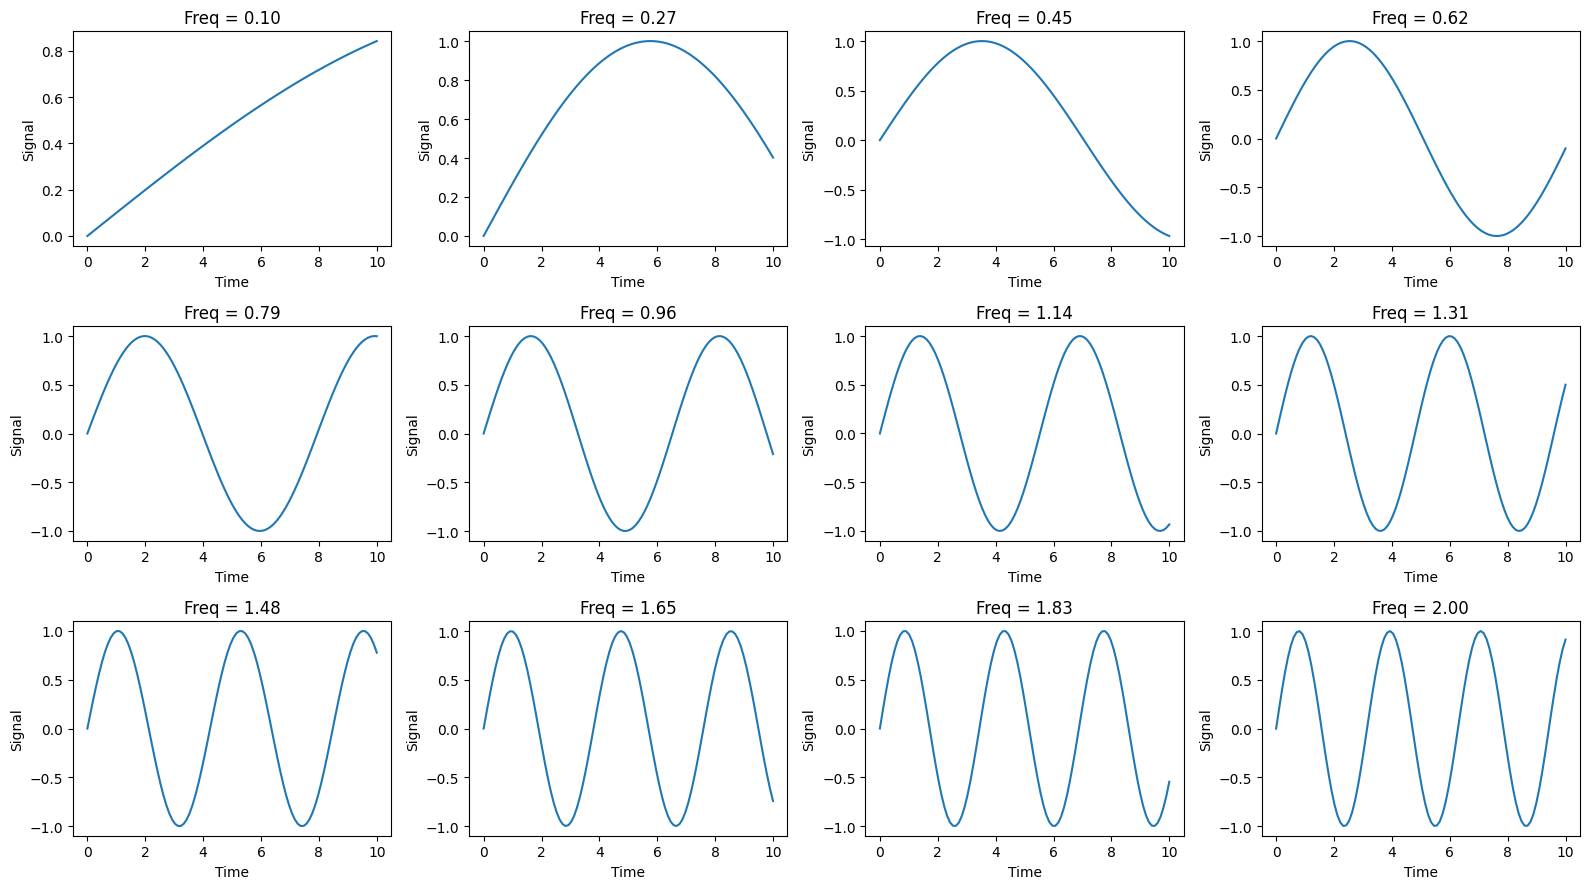

In [53]:
arrays = check_coherence_test(t_fit520, flux_fit520, weight_fit520, final_freqs520, exptime520)
oms = np.linspace(0.1, 2.0, 12)
x = np.linspace(0, 10, 100)
ys = np.sin(np.outer(x, oms))  # shape (100, 12)

# 3 rows, 4 columns grid
fig, axes = plt.subplots(3, 4, figsize=(16, 9))

for ax, freq, (a,b) in zip(axes.flat, final_freqs520, ys.T):
    ax.plot(a,b)
    ax.set_title(f"Freq = {om:.2f}")
    ax.set_xlabel("Time")
    ax.set_ylabel("Signal")

plt.tight_layout()
plt.show()

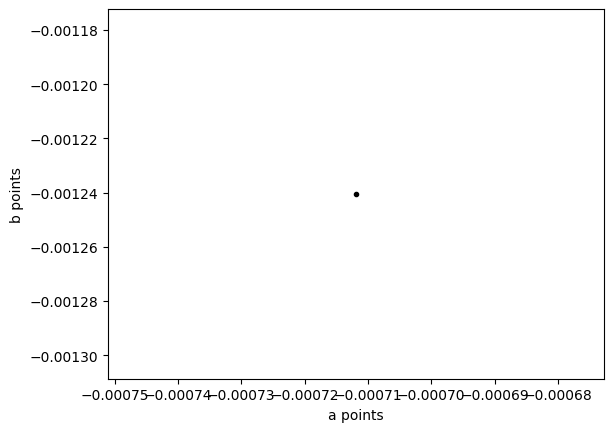

In [63]:
plt.plot(arrays[0][0][0], arrays[0][0][1], 'k.')
plt.plot(arrays[0][0][0], arrays[0][0][1], 'k.')
plt.plot(arrays[0][0][0], arrays[0][0][1], 'k.')
plt.plot(arrays[0][0][0], arrays[0][0][1], 'k.')

#plt.title("First Quarter KIC 5202905")
plt.ylabel("b points")
plt.xlabel("a points")
plt.show()

In [60]:
print(arrays[0], arrays[0])

[[-0.00071186 -0.00124048]
 [-0.00043651 -0.00150559]
 [-0.00053075 -0.00189763]
 [-0.00091871 -0.00177852]] [[-0.00071186 -0.00124048]
 [-0.00043651 -0.00150559]
 [-0.00053075 -0.00189763]
 [-0.00091871 -0.00177852]]


In [8]:
arrays = check_coherence_test(t_fit520, flux_fit520, weight_fit520, final_freqs520, exptime520)
print(arrays)

[[[-7.11856113e-04 -1.24048169e-03]
  [-4.36508280e-04 -1.50558776e-03]
  [-5.30749068e-04 -1.89763263e-03]
  [-9.18707008e-04 -1.77852227e-03]]

 [[-3.70587361e-04 -4.81870362e-04]
  [-4.36853114e-04 -4.58696017e-04]
  [-5.16667194e-04 -5.23367749e-04]
  [-5.84571048e-04 -7.15582566e-04]]

 [[ 4.46104818e-04  5.63045943e-05]
  [ 4.67642792e-04  4.36555343e-05]
  [ 4.98525469e-04  4.42984309e-05]
  [ 5.33456651e-04  6.31407608e-05]]

 [[-2.25688089e-04 -2.73803204e-04]
  [-2.71843026e-04 -3.39943516e-04]
  [-2.90221286e-04 -3.95741057e-04]
  [-3.46591152e-04 -4.20975541e-04]]

 [[ 3.24565741e-05  1.97190186e-04]
  [ 1.89935962e-05  1.90020762e-04]
  [ 2.58000517e-05  1.98712156e-04]
  [ 2.49320695e-05  2.02284282e-04]]

 [[-6.72778802e-05  2.12968428e-04]
  [-7.30907468e-05  2.08999742e-04]
  [-6.73772559e-05  2.03259687e-04]
  [-7.10028146e-05  2.15474773e-04]]

 [[-1.63003739e-04  1.91539833e-04]
  [-1.60375374e-04  1.83788017e-04]
  [-1.49070956e-04  1.78105960e-04]
  [-1.53927405e-

In [79]:
import matplotlib.ticker as ticker

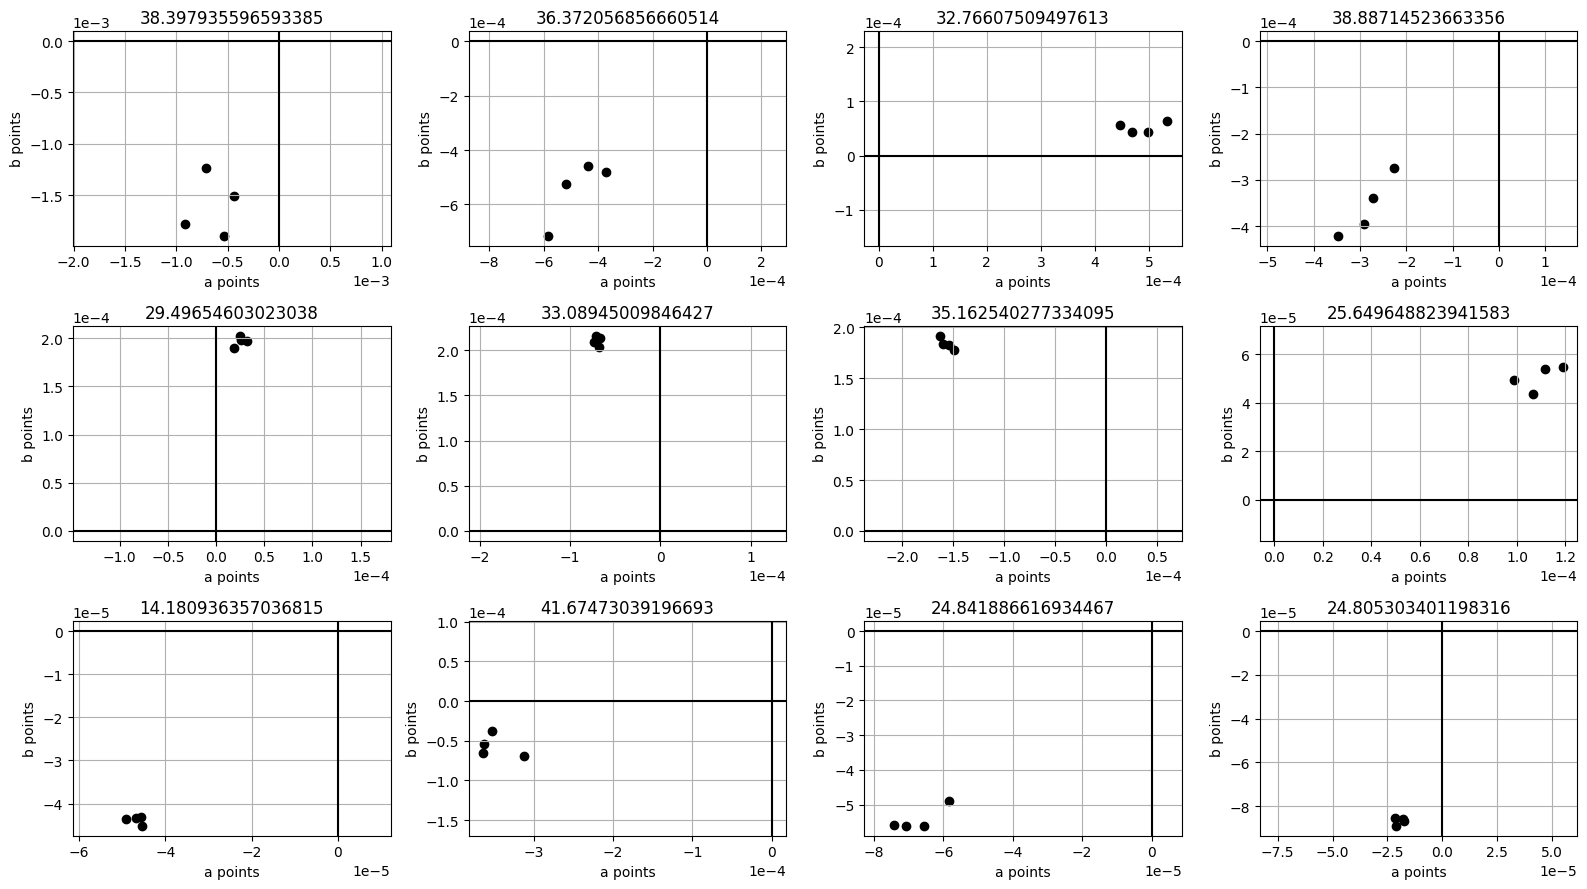

In [28]:
fig, axes = plt.subplots(3, 4, figsize=(16, 9))
#fig, axes = plt.subplots(3, 4, figsize=(16, 9), sharex=True, sharey=True)

for idx, (ax, points) in enumerate(zip(axes.flat, arrays)):
    a = points[:, 0]  # x values for this frequency
    b = points[:, 1]  # y values for this frequency
    
    ax.scatter(a, b, color = 'k')
    ax.axvline(0, color = 'k')
    ax.axhline(0, color = 'k')
    ax.set_title(final_freqs520[idx])
    ax.set_xlabel("a points")
    ax.set_ylabel("b points")
    ax.grid(True)
    ax.ticklabel_format(style='sci', scilimits=(-3, 3), axis='both')
    ax.axis('equal')
    
    


plt.tight_layout()
#for ax in axes.flat:
    #ax.axis('equal')